In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('Advertising.csv')
data

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [5]:
data.drop('Unnamed: 0', axis=1, inplace = True)


In [6]:
data

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


### Basic check

In [7]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [8]:
data.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,13.4


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [10]:
data.describe()   # statistical information of data

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


## EDA

Univariate Analysis

<AxesSubplot:xlabel='TV', ylabel='Count'>

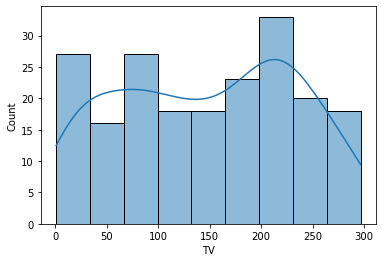

In [11]:
sns.histplot(data['TV'], kde = True)


<AxesSubplot:xlabel='Radio', ylabel='Count'>

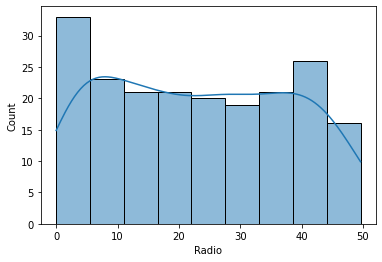

In [13]:
sns.histplot(data['Radio'], kde=True)

<AxesSubplot:xlabel='Newspaper', ylabel='Count'>

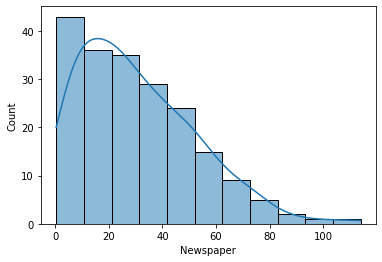

In [14]:
sns.histplot(data['Newspaper'], kde=True)

Bivariate Analysis

<AxesSubplot:xlabel='TV', ylabel='Sales'>

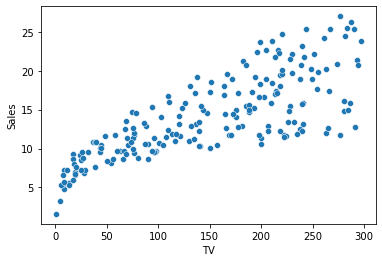

In [15]:
sns.scatterplot(x=data['TV'], y=data['Sales'])

<AxesSubplot:xlabel='Radio', ylabel='Sales'>

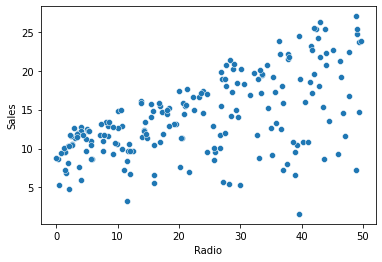

In [16]:
sns.scatterplot(x=data['Radio'], y=data['Sales'])

<AxesSubplot:xlabel='Newspaper', ylabel='Sales'>

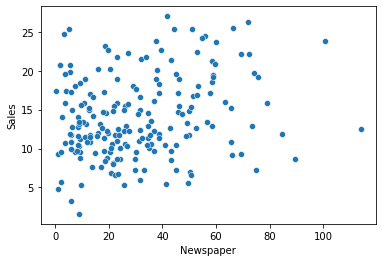

In [17]:
sns.scatterplot(x=data['Newspaper'], y=data['Sales'])

Data preprocessing

In [18]:
data.isnull().sum()  #Handeling null values

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

<AxesSubplot:xlabel='Radio'>

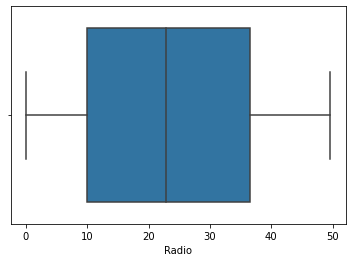

In [21]:
sns.boxplot(x = 'Radio', data=data)

<AxesSubplot:xlabel='TV'>

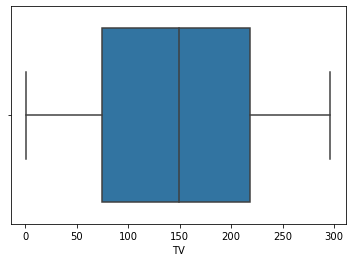

In [22]:
sns.boxplot(x = 'TV', data=data)

<AxesSubplot:xlabel='Newspaper'>

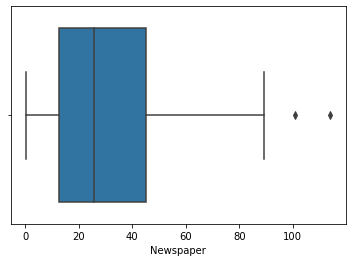

In [23]:
sns.boxplot(x = 'Newspaper', data=data)

<AxesSubplot:xlabel='Sales'>

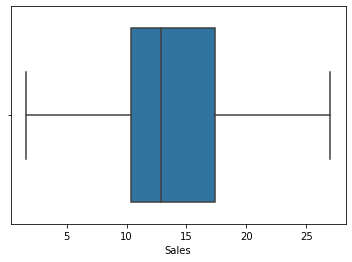

In [25]:
sns.boxplot(x = 'Sales', data=data)

In [37]:
data.loc[data.Newspaper > 90, 'Newspaper']  #outliers

16     114.0
101    100.9
Name: Newspaper, dtype: float64

In [38]:
np.median(data.Newspaper)  #median

25.75

In [41]:
data.loc[data.Newspaper > 90, 'Newspaper'] = np.median(data.Newspaper)
data.Newspaper

0      69.2
1      45.1
2      69.3
3      58.5
4      58.4
       ... 
195    13.8
196     8.1
197     6.4
198    66.2
199     8.7
Name: Newspaper, Length: 200, dtype: float64

<AxesSubplot:xlabel='Newspaper'>

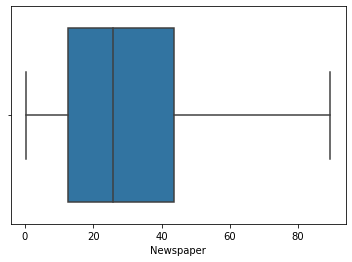

In [40]:
sns.boxplot(x = 'Newspaper', data = data)

Feature selection

In [42]:
data.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.048462,0.782224
Radio,0.054809,1.000000,0.343141,0.576223
Newspaper,0.048462,0.343141,1.000000,0.215938
Sales,0.782224,0.576223,0.215938,1.000000


In [44]:
data.drop('Sales', axis = 1).corr()

,TV,Radio,Newspaper
TV,1.000000,0.054809,0.048462
Radio,0.054809,1.000000,0.343141
Newspaper,0.048462,0.343141,1.000000


<AxesSubplot:>

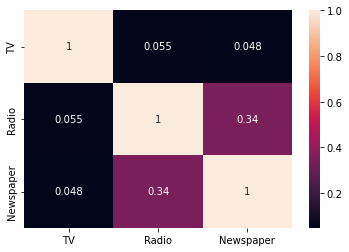

In [47]:
sns.heatmap(data.drop('Sales', axis = 1).corr(), annot=True)

Model Creation

In [48]:
x = data[['TV', 'Radio', 'Newspaper']]
x

# x = data.drop('Sales', axis = 1)

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [49]:
y = data.Sales
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

In [50]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)

In [51]:
x_train

,TV,Radio,Newspaper
114,78.2,46.8,34.5
173,168.4,7.1,12.8
5,8.7,48.9,75.0
126,7.8,38.9,50.6
117,76.4,0.8,14.8
...,...,...,...
106,25.0,11.0,29.7
14,204.1,32.9,46.0
92,217.7,33.5,59.0
179,165.6,10.0,17.6


In [52]:
x_test

,TV,Radio,Newspaper
95,163.3,31.6,52.90
15,195.4,47.7,52.90
30,292.9,28.3,43.20
158,11.7,36.9,45.20
128,220.3,49.0,3.20
115,75.1,35.0,52.70
69,216.8,43.9,27.20
170,50.0,11.6,18.40
174,222.4,3.4,13.10
45,175.1,22.5,31.50


In [53]:
len(x_test)

50

In [55]:
y_train

114    14.6
173    11.7
5       7.2
126     6.6
117     9.4
       ... 
106     7.2
14     19.0
92     19.4
179    12.6
102    14.8
Name: Sales, Length: 150, dtype: float64

In [56]:
y_test

95     16.9
15     22.4
30     21.4
158     7.3
128    24.7
115    12.6
69     22.3
170     8.4
174    11.5
45     14.9
66      9.5
182     8.7
165    11.9
78      5.3
186    10.3
177    11.7
56      5.5
152    16.6
82     11.3
68     18.9
124    19.7
16     12.5
148    10.9
93     22.2
65      9.3
60      8.1
84     21.7
67     13.4
125    10.6
132     5.7
9      10.6
18     11.3
55     23.7
75      8.7
150    16.1
104    20.7
135    11.6
137    20.8
164    11.9
76      6.9
79     11.0
197    12.8
38     10.1
24      9.7
122    11.6
195     7.6
29     10.5
19     14.6
143    10.4
86     12.0
Name: Sales, dtype: float64

In [57]:
# apply linear regression model
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(x_train, y_train)

LinearRegression()

In [58]:
y_pred = LR.predict(x_test)
y_pred

array([16.37516878, 20.92223369, 21.61337898, 10.48546649, 22.20303253,
       13.01791749, 21.11420367,  7.31962728, 13.57228717, 15.12291625,
        8.93946863,  6.49261545, 14.26701237,  8.7842258 ,  9.58212372,
       12.08817162,  8.58994144, 16.26413221, 10.16673733, 18.87228047,
       19.56143279, 12.93858841, 12.26579131, 21.33586587,  7.70676623,
        5.64346817, 20.80490942, 11.91827415,  9.06398829,  8.38798291,
       12.40795381,  9.89916746, 21.42171662, 12.11530527, 18.28438126,
       20.2013917 , 14.01217105, 20.88906686, 10.94242836,  4.38355012,
        9.58099984, 12.6268183 ,  9.93592621,  8.07030243, 13.45825686,
        5.25875537,  9.14511273, 14.10280757,  8.70203985, 11.55985811])

In [59]:
y_test

95     16.9
15     22.4
30     21.4
158     7.3
128    24.7
115    12.6
69     22.3
170     8.4
174    11.5
45     14.9
66      9.5
182     8.7
165    11.9
78      5.3
186    10.3
177    11.7
56      5.5
152    16.6
82     11.3
68     18.9
124    19.7
16     12.5
148    10.9
93     22.2
65      9.3
60      8.1
84     21.7
67     13.4
125    10.6
132     5.7
9      10.6
18     11.3
55     23.7
75      8.7
150    16.1
104    20.7
135    11.6
137    20.8
164    11.9
76      6.9
79     11.0
197    12.8
38     10.1
24      9.7
122    11.6
195     7.6
29     10.5
19     14.6
143    10.4
86     12.0
Name: Sales, dtype: float64

In [60]:
LR.coef_   # m1, m2, m3

array([0.04545323, 0.19180224, 0.0020187 ])

In [61]:
LR.intercept_   # c

2.784915436626232

Model Evaluation

In [71]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [68]:
mse = mean_squared_error(y_test, y_pred)

In [64]:
mean_absolute_error(y_test, y_pred)

1.395672239817134

In [69]:
import math
math.sqrt(mse)

1.6941095082527433

In [77]:
r2 = r2_score(y_test, y_pred)
r2

0.8938866815336232

In [79]:
adjusted_r2 = 1-((1-r2)*(50-1)/(50-3-1))
adjusted_r2

0.8869662477205986